In [263]:
import math

def fresnelPar(eta_2: float, theta: float) -> float:
    eta_1: float = 1
    cos_gamma_i: float = math.cos(theta)

    a: float = ((eta_1 / eta_2) * math.sin(theta))
    b: float = a * a

    if (b > 1): return 1

    cos_gamma_t: float = math.sqrt(1 - b)

    R: float = (eta_2 * cos_gamma_i - eta_1 * cos_gamma_t) / (eta_2 * cos_gamma_i + eta_1 * cos_gamma_t)

    return min(1, R * R)

def fresnelPer(eta_2: float, theta : float) -> float:
    eta_1: float = 1
    cos_gamma_i: float = math.cos(theta)

    a: float = ((eta_1 / eta_2) * math.sin(theta))
    b: float = a * a

    if (b > 1): return 1

    cos_gamma_t: float = math.sqrt(1 - b)

    R: float = (eta_1 * cos_gamma_i - eta_2 * cos_gamma_t) / (eta_1 * cos_gamma_i + eta_2 * cos_gamma_t)

    return min(1, R * R)


def fresnel0(eta_parallel : float, eta_perpendic : float, theta : float) -> float:
    return 0.5 * (pow(fresnelPer(eta_perpendic, theta), 2) + pow(fresnelPar(eta_parallel, theta), 2))

def fresnel(eta_parallel : float, eta_perpendic : float, theta : float) -> float:
    cos_theta: float = math.cos(theta)
    flipped: float = 1.0 - cos_theta
    flipped_squared: float = flipped * flipped
    fresnel_0: float = fresnelPar(eta_parallel, theta)
    fresnel_90:float = fresnelPer(eta_perpendic, theta)

    return fresnel_0 + (fresnel_90 - fresnel_0) * (flipped_squared * flipped * flipped_squared)

def fresnel2(eta : float, x: float) -> float:
    F_0: float = pow(1 - eta, 2) / pow(1 + eta, 2)
    return F_0 + (1 - F_0) * pow(1 - x, 5)


In [264]:
def T(absorb : float, gamma_t : float) -> float:
    l : float = 1 + math.cos(2 * gamma_t)
    return math.exp(-2 * absorb * l)

In [265]:
def calc_lenght(a: list) -> float:
    length: float = 0
    for coord in a:
        length += coord ** 2
    return math.sqrt(length)

def normalise(a: list) -> list:
    lenght: float = calc_lenght(a)
    for i in range(len(a)):
        a[i] /= lenght
    return a

def dot(a: list, b: list) -> float:
    if(len(a) != len(b)): return float('nan')
    dotpr: float = 0
    for i in range(len(a)):
        dotpr += a[i] * b[i]
    return round(dotpr, 10)

def mult(a: list, b: float) -> list:
    x = a[0] * b
    y = a[1] * b
    z = a[2] * b

    return[x, y, z]

def minus(a: list, b: list) -> list:
    x = a[0] - b[0]
    y = a[1] - b[1]
    z = a[2] - b[2]

    return[x, y, z]

def cross(a: list, b: list) -> list:
    x = a[1]*b[2] - a[2]*b[1]
    y = a[2]*b[0] - a[0]*b[2]
    z = a[0]*b[1] - a[1]*b[0]
    
    return[x, y, z]

def rotate_z(a: list, rad: float) -> list:
    x: float = a[0] * math.cos(rad) - a[1] * math.sin(rad)
    y: float = a[0] * math.sin(rad) + a[1] * math.cos(rad)
    z: float = a[2]

    return [x, y, z]

def rotate_y(a: list, rad: float) -> list:
    x: float = a[0] * math.cos(rad) + a[2] * math.sin(rad)
    y: float = a[1]
    z: float = -a[0] * math.sin(rad) + a[2] * math.cos(rad)

    return [x, y, z]

def rotate_x(a: list, rad: float) -> list:
    x: float = a[0]
    y: float = a[1] * math.cos(rad) - a[2] * math.sin(rad)
    z: float = a[1] * math.sin(rad) + a[2] * math.cos(rad)

    return [x, y, z]


In [266]:


def absorption(absorb: float, p: int, h: float, eta_parallel: float,  eta_perpendic: float, theta: float) -> float:
    gamma_i: float = math.asin(h)
    fres : float= fresnel(eta_parallel, eta_perpendic, gamma_i)
    if(p == 0):
        return fres
    
    gamma_t : float = math.asin(h / eta_perpendic)
    inv_fres: float = fresnel(1 / eta_parallel, 1 / eta_perpendic, gamma_t)

    t : float= T(absorb, gamma_t)

    return (1 - fres) * (1 - fres) * pow(inv_fres, p - 1) * pow(t, p)

In [267]:
def B_index(theta :float, eta : float) -> float :
    sin_theta : float = math.sin(theta)
    return math.sqrt(eta - sin_theta * sin_theta) / math.cos(theta)

def B_index_k(theta :float, eta : float) -> float :
    sin_theta : float = math.sin(theta)
    return math.sqrt(eta * eta - sin_theta * sin_theta) / math.cos(theta)

def C_index(theta :float, eta : float) -> float :
    return eta * math.cos(theta) / (math.sqrt(1 - pow(eta, -2) * pow(math.sin(theta), 2)))


In [268]:
epsilon = 0.00001

def sign(x: float) -> int:
    if x > 0: return 1
    if x < 0: return -1
    return 0


def LinearSolver(a: float, b: float) -> list:
    roots: list = [0, 0, 0, 0]
    # roots: list = [float('nan'), float('nan'), float('nan'), float('nan')]

    if (abs(a) > epsilon):
        roots[0] = -b / a
        roots[3] = 1

    return roots


def QuadraticSolver( a: float,  b: float ,  c: float) -> list:
    roots: list = [0, 0, 0, 0]
    # roots: list = [float('nan'), float('nan'),float('nan'), float('nan')]

    if (abs(a) < epsilon): return LinearSolver(b, c)

    else:
        D : float = b * b - 4 * a * c

        if (abs(D) < epsilon):
            roots[0] = -b / (2 * a)
            roots[1] = -b / (2 * a)
            roots[3] = 2

        elif (D > 0):
            delta: float = math.sqrt(D)
            roots[0] = (-b + delta) / (2 * a)
            roots[1] = (-b - delta) / (2 * a)
            roots[3] = 2

    return roots


def NormalizedCubicSolver(A: float,  B: float, C: float) -> list:
    roots: list = [0, 0, 0, 0]
    # roots: list = [float('nan'), float('nan'),float('nan'), float('nan')]

    if (abs(C) < epsilon):
        roots = QuadraticSolver(1, A, B)
        roots[int(roots[3])] = 0
        roots[3] += 1

    else:
        Q: float = (3 * B - A * A) / 9
        R: float = (9 * A * B - 27 * C - 2 * A * A * A) / 54
        D: float = Q * Q * Q + R * R

        if (D > 0):
            sqrtD: float = math.sqrt(D)
            s: float = sign(R + sqrtD) * pow(abs(R + sqrtD), 1.0 / 3.0)
            t: float = sign(R - sqrtD) * pow(abs(R - sqrtD), 1.0 / 3.0)

            roots[0] = (-A / 3 + (s + t))
            roots[3] = 1
        
        else:
            theta: float = math.acos(R / math.sqrt(-(Q * Q * Q)))
            sqrtQ: float = math.sqrt(-Q)
            roots[0] = (2 * sqrtQ * math.cos(theta / 3) - A / 3)
            roots[1] = (2 * sqrtQ * math.cos((theta + 2 * math.pi) / 3) - A / 3)
            roots[2] = (2 * sqrtQ * math.cos((theta + 4 * math.pi) / 3) - A / 3)
            roots[3] = 3
        
    return roots


def cubic_solver(a: float, b: float, c: float, d: float) -> list:
    if (abs(a) < epsilon):
        roots =  QuadraticSolver(b, c, d)
    
    else:
        roots = NormalizedCubicSolver(b / a, c / a, d / a)

    check_roots(a, b, c, d, roots)
    return roots

def check_roots(a, b, c, d, roots):

    for i in range(roots[3]):
        x = roots[i]
        expr = a * (x**3) + b * (x**2) + c * x + d
        # expr = ((a * x + b) * x + c) * x + d
        if(abs(expr) > epsilon):
            print(f"Error{i}/{roots[3]}: A={a}, B={b}, C={c}, D={d}, X={x}: {expr}")


def calc_roots(p , eta_perpendic, phi) -> list:
    c : float = math.asin(1 / eta_perpendic)
    return cubic_solver(-8 * (p * c / (math.pi * math.pi * math.pi)), 0, (6 * p * c / math.pi - 2), p * math.pi - phi)


In [269]:
def NP(p: int, phi: float, theta_d : float, eta : float,  absorb : float) -> float:
    eta_perpendic : float = B_index(theta_d, eta)
    eta_parallel : float = C_index(theta_d, eta)

    roots : list = calc_roots(p, eta_perpendic, phi)
    res : float = 0
    for i in range(roots[3]):
        h: float = math.sin(roots[i])
        # if(h >= epsilon): continue
        res += absorption(absorb, p, h, eta_parallel, eta_perpendic, theta_d)
        
    return res



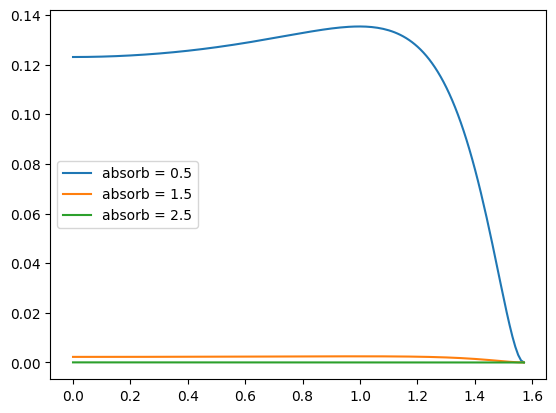

In [270]:
import matplotlib.pyplot as plt

p: float = 1
eta: float =  1.55

abs1: float = 0.5
abs2: float = 1.5
abs3: float = 2.5

phi: float = math.pi 

A1 = []
A2 = []
A3 = []

thetas = []
theta = math.pi / 2

while True:
    if theta < 0: break

    A1.append(NP(p, phi, theta, eta, abs1))
    A2.append(NP(p, phi, theta, eta, abs2))
    A3.append(NP(p, phi, theta, eta, abs3))
    thetas.append(theta)
    theta -= 0.01

plt.plot(thetas, A1, label = "absorb = 0.5") 
plt.plot(thetas, A2, label = "absorb = 1.5") 
plt.plot(thetas, A3, label = "absorb = 2.5") 
plt.legend() 
plt.show()

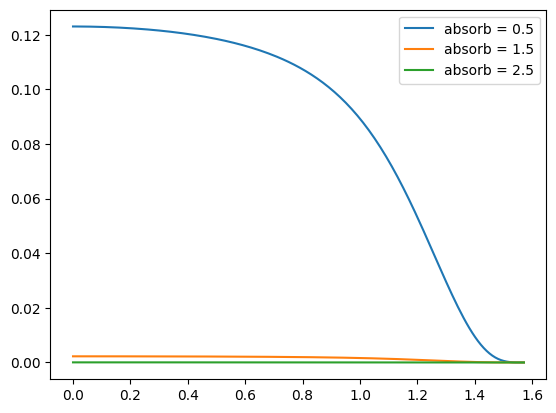

In [271]:
import matplotlib.pyplot as plt
def B_index_k(theta :float, eta : float) -> float :
    sin_theta : float = math.sin(theta)
    return math.sqrt(eta * eta - sin_theta * sin_theta) / math.cos(theta)

def calc_h_2_tt(phi: float, a: float):
    top = 0.5 + 0.5 * math.cos(phi)
    bottom = 1 + a * a - 2 * a * math.sqrt(0.5 - 0.5 * math.cos(phi))
    return top/bottom

def absorb(theta_d, eta, hair_color, phi):
    eta_perpendic: float = B_index_k(theta_d, eta)
    a: float = 1/eta_perpendic
    h_2: float = 0
    fres_angle = math.cos(theta_d) * math.sqrt(1 - h_2)
    # fres: float = fresnel(eta_parallel, eta_perpendic, fres_angle)
    fres: float = fresnel2(eta_perpendic, fres_angle)

    gamma_t : float = math.asin(0 / eta_perpendic)
    t : float= T(hair_color, gamma_t)
    
    # exponent: float = math.sqrt(1 - h_2 * (a * a)) / (2 * math.cos(theta_d))
    # t: float = pow(hair_color, exponent)
    att: float = (1 - fres) * (1 - fres) * t
    return att


p: float = 1
eta: float =  1.55

abs1: float = 0.5
abs2: float = 1.5
abs3: float = 2.5

phi: float = math.pi

A1 = []
A2 = []
A3 = []

thetas = []
theta = math.pi / 2
while True:
    if theta < 0: break
    A1.append(absorb(theta, eta, abs1, phi))
    A2.append(absorb(theta, eta, abs2, phi))
    A3.append(absorb(theta, eta, abs3, phi))
    thetas.append(theta)
    theta -= 0.01
plt.plot(thetas, A1, label = "absorb = 0.5") 
plt.plot(thetas, A2, label = "absorb = 1.5") 
plt.plot(thetas, A3, label = "absorb = 2.5") 
plt.legend() 
plt.show()

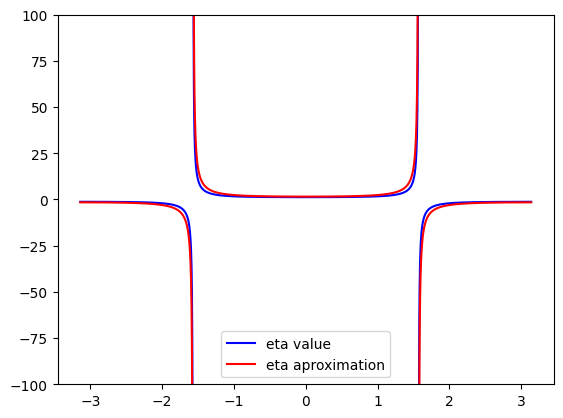

In [272]:
eta: float =  1.55
eta_tick = []
eta_tick_aprox = []
thetas = []

theta = math.pi
while True:
    if theta < -math.pi: break
    eta_tick.append(B_index(theta, eta))
    eta_tick_aprox.append((1.19 / math.cos(theta)) + 0.36 * math.cos(theta))
    thetas.append(theta)
    theta -= 0.001

eta_tick_split = [[]]
eta_tick_aprox_split = [[]]
thetas_split = [[]]
list_index = 0

for i in range(len(eta_tick)):
    if(i == 0): continue

    if((eta_tick[i] > 0 and eta_tick[i - 1] < 0) or (eta_tick[i] < 0 and eta_tick[i - 1] > 0)):
        eta_tick_split.append([])
        thetas_split.append([])
        eta_tick_aprox_split.append([])
        list_index += 1

    eta_tick_split[list_index].append(eta_tick[i])
    eta_tick_aprox_split[list_index].append(eta_tick_aprox[i])
    # thetas_split[list_index].append(math.degrees(thetas[i]))
    thetas_split[list_index].append(thetas[i])

ax = plt.gca()
ax.set_ylim([-100, 100])
for i in range(len(eta_tick_split)):
    if i == 0:
        plt.plot(thetas_split[i], eta_tick_split[i], label = "eta value", color="blue")
        plt.plot(thetas_split[i], eta_tick_aprox_split[i], label = "eta aproximation", color="red")
    else:
        plt.plot(thetas_split[i], eta_tick_split[i], color="blue")
        plt.plot(thetas_split[i], eta_tick_aprox_split[i], color="red")

# plt.plot(thetas, eta_tick_aprox, label = "aproximation") 
plt.legend() 
plt.show()

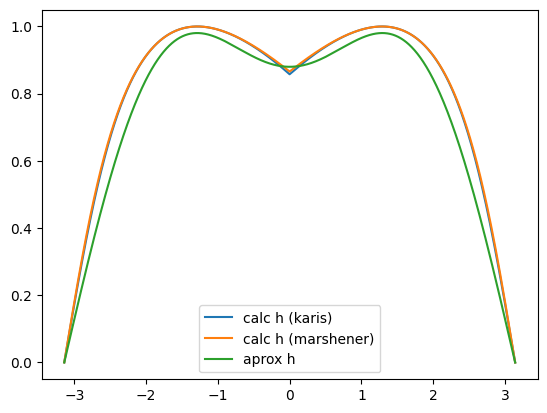

In [273]:
def calc_h(phi: float, inv_eta_tick: float) -> float:
    top: float = sign(phi) * math.cos(phi / 2)
    bottom: float = math.sqrt(1 + pow(inv_eta_tick, 2) - 2 * inv_eta_tick * sign(phi) * math.sin(phi / 2))

    return abs(top / bottom)

def get_h(phi: float, eta_perpendic: float) -> float:
    
    roots : list = calc_roots(1, eta_perpendic, phi)
    for gamma_i in roots:
        if not math.isnan(gamma_i): return math.sin(gamma_i)

h1 = []
h2 = []
h3 = []
phis = []

phi = math.pi
a = 0.6
while True:
    if phi < -math.pi: break
    h1.append(calc_h(phi, a))
    h2.append(get_h(abs(phi), (1/a)))
    h3.append((1 + a * (0.6 - 0.8 * math.cos(phi))) * math.cos(phi / 2))
    
    phis.append(phi)
    phi -= 0.001

plt.plot(phis, h1, label = "calc h (karis)") 
plt.plot(phis, h2, label = "calc h (marshener)") 
plt.plot(phis, h3, label = "aprox h") 
plt.legend() 
plt.show()

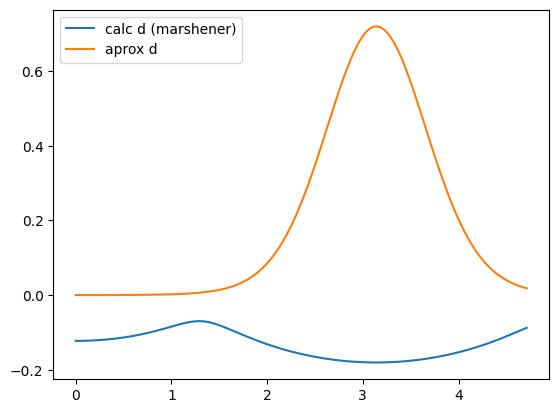

In [274]:



def inv_first_der(p: int, eta_perpendic: float, phi: float) -> float:
  h: float = (1 + a * (0.6 - 0.8 * math.cos(phi))) * math.cos(phi / 2)
  gamma_i: float = math.asin(h)
  c: float = math.asin( 1 / eta_perpendic )
  d_gamma: float = ((6 * p * c / math.pi) - 2) - 3 * 8 * (p * c / pow(math.pi, 3)) * gamma_i * gamma_i
  return math.sqrt(1 - h * h) / d_gamma

d1 = []
d2 = []
phis = []

phi = 1.5 * math.pi
while True:
    if phi < 0: break
    d1.append(inv_first_der(2, B_index(math.pi, 1.55), phi))
    d2.append(math.exp(-3.65 * math.cos(phi) - 3.98))
    
    phis.append(phi)
    phi -= 0.001

plt.plot(phis, d1, label = "calc d (marshener)") 
plt.plot(phis, d2, label = "aprox d") 
plt.legend() 
plt.show()

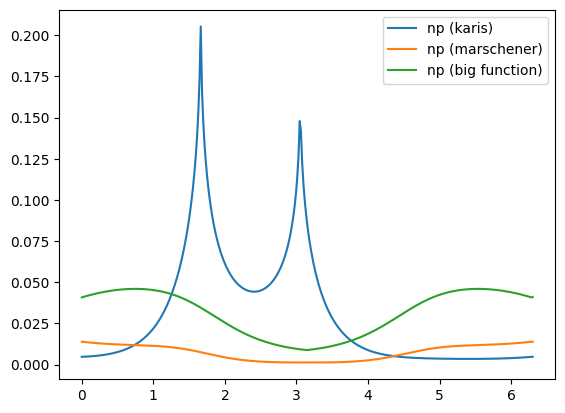

In [275]:


def NP_R_K(phi: float, theta_d : float, eta: float, view_light_angle: float) -> float:
    eta_perpendic: float = B_index(theta_d, eta)
    eta_parallel: float = (eta * eta) / eta_perpendic

    # gamma_i: float = -phi / 2
    # h: float = math.sin(gamma_i)
    res: float = 0.25 * math.cos(phi / 2)
    # res *= fresnel(eta_perpendic, eta_parallel, math.sqrt(abs(0.5 * (math.radians(1) + view_light_angle))))
    res *= fresnel2(eta_perpendic, math.sqrt(abs(0.5 * (math.radians(2) + view_light_angle))))
    return res

def NP_R(phi: float, theta_d: float, eta: float)  -> float:
    eta_perpendic: float = B_index(theta_d, eta)
    eta_parallel: float = (eta * eta) / eta_perpendic 

    gamma_i: float = -phi / 2
    h: float = math.sin(gamma_i)

    #this one is from the implementation I found
    res: float = math.sqrt(1 - h * h)
    res *= fresnel(eta_perpendic, eta_parallel, gamma_i)
    return min(res, 1)


tangent = normalise([0, 0, -1])
light = normalise([1, 1, 1])
view = normalise([1, 1, 0])

rot_angles = []
theta_ds = []
theta_rs = []
theta_is = []
np1 = []
np2 = []
np3 = []
phis = []
total_rot = 0
eta = 1.55
i = 0
while True:
    dotLightTangent: float = dot(light, tangent)
    dotViewTangent: float = dot(view, tangent)
    
    LT_P: list = normalise(minus(light, mult(tangent, dotLightTangent)))
    VT_P: list = normalise(minus(view, mult(tangent, dotViewTangent)))
    
    Normal: list = normalise(LT_P + VT_P)
    Binormal: list = normalise(cross(Normal, tangent))

    theta_r: float = math.acos(dot(VT_P, view))
    theta_i: float = math.acos(dot(LT_P, light))
    theta_d: float = (theta_r - theta_i) / 2
    phi_r : float = math.acos(dot(Binormal, VT_P))
    phi_i : float = math.acos(dot(Binormal, LT_P))
    phi : float = phi_r - phi_i
    theta_ds.append(theta_d)
    theta_rs.append(theta_r)
    theta_is.append(theta_i)
    phis.append(phi)
    rot_angles.append(total_rot)
    
    np1.append(NP_R_K(phi, theta_d, eta, dot(view, light)))
    np2.append(NP_R(phi, theta_d, eta))

    np3.append(NP(0, phi, theta_d, eta, 5))
    # phis.append(theta_d)

    if total_rot > math.pi * 2 or i == 3000: break
    view = normalise(rotate_y(view, 0.0175))
    total_rot += 0.0175
    i += 1


# plt.plot(rot_angles, phis, label = "phi")  
# plt.plot(rot_angles, theta_rs, label = "theta_r") 
# plt.plot(rot_angles, theta_ds, label = "theta_d") 
plt.plot(rot_angles, np1, label = "np (karis)") 
plt.plot(rot_angles, np2, label = "np (marschener)") 
plt.plot(rot_angles, np3, label = "np (big function)") 
plt.legend() 
plt.show()

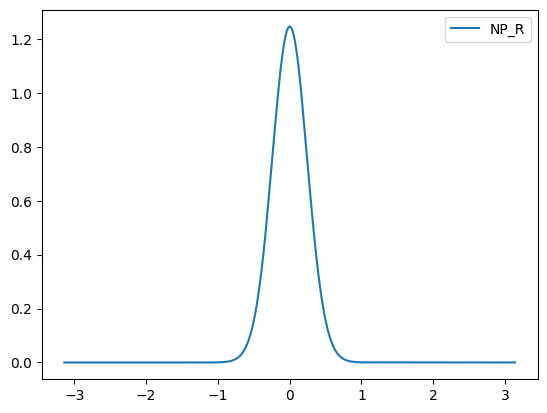

In [276]:
phi = math.pi
np1 = []
phis = []
while True:
    if phi < -math.pi: break
    np1.append(math.exp(17 * math.cos(phi) - 16.78))
    
    phis.append(phi)
    phi -= 0.001

plt.plot(phis, np1, label = "NP_R") 
plt.legend() 
plt.show()

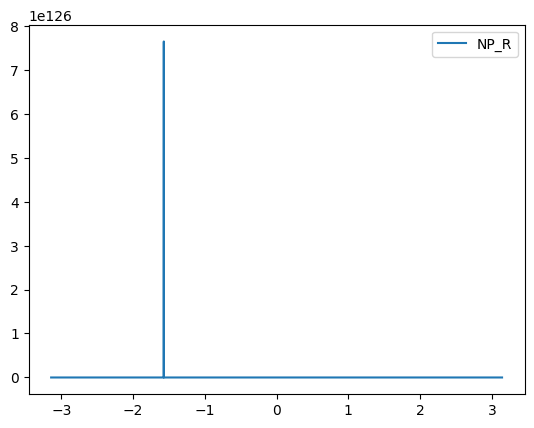

In [277]:
theta = math.pi
C = 0.8
t1 = []
thetas = []
while True:
    if theta < -math.pi: break
    t1.append(C ** (0.8 / math.cos(theta)))
    
    thetas.append(theta)
    theta -= 0.001

plt.plot(thetas, t1, label = "NP_R") 
plt.legend() 
plt.show()

In [278]:
def S(theta_d: float) -> float:
    eta = 1.55
    eta_perpendic : float = B_index(theta_d, eta)
    a: float = 1/eta_perpendic
    r = math.asin(a)
    d = (math.sqrt(2) - r) / (1 - r)
    return -math.pi/2 * (1 - a) * math.log(2 * d - 1 - 2 * math.sqrt(d * (d - 1)), math.e)

def D(phi: float, s: float, mu: float) -> float:
    top = math.exp((phi - mu) / s)
    bottom = pow(S(1 + math.exp((phi - mu) / s)), 2)

    return top / bottom

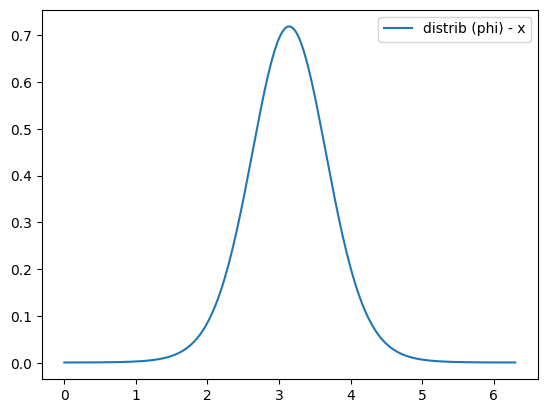

In [279]:

phis = []
distrib1 = []
distrib2 = []
distrib3 = []
phi = 0
eta = 1.55

while True:
    distrib1.append(math.exp(-3.65 * math.cos(phi - 3.98)))
    distrib2.append(math.exp(-3.65 * math.cos(phi) - 3.98))
    distrib3.append(D(phi, 0.35, math.pi))

    phis.append(phi)
    if phi > math.radians(360) : break
    phi += 0.0175



# plt.plot(rot_angles, distrib1, label = "distrib (phi - x)") 
plt.plot(rot_angles, distrib2, label = "distrib (phi) - x") 
# plt.plot(phis, distrib3, label = "disney") 

plt.legend() 
plt.show()

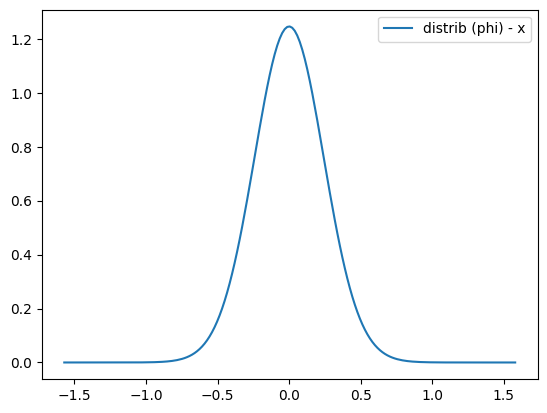

In [292]:
def clamp(x: float, minval: float, maxval: float) -> float:
    return min(max(x, minval), maxval)





phis = []
distrib1 = []
distrib2 = []
distrib3 = []
phi = - math.pi / 2
eta = 1.55
long_width_R: float = math.radians(15.0)    
scale: float = clamp(1.5 * (1 - long_width_R), -1, 1)

while True:
    distrib1.append(scale * math.exp(scale * (17 * math.cos(phi) - 16.78)))
    phis.append(phi)
    if phi > math.pi / 2 : break
    phi += 0.0175



# plt.plot(rot_angles, distrib1, label = "distrib (phi - x)") 
plt.plot(phis, distrib1, label = "distrib (phi) - x") 
# plt.plot(phis, distrib3, label = "disney") 

plt.legend() 
plt.show()